#### CRC TCR Sequencing Bulk Data Analysis
This notebook contains the general analysis done on the bulk sequencing data. 

#### Set Environment

In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
READ_SAMPLED_DATA = True
READ_EMBEDDINGS = True

In [3]:
# read in all_data_df
if READ_SAMPLED_DATA:
    CRC_data_df = pd.read_csv('/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/downsampled_data_with_PP_labels.csv')
if READ_EMBEDDINGS:
    embedding_data_df = pd.read_pickle('/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/downsampled_data_with_PP_labels_embeddings.pkl')

In [4]:
# rename a few columns 
CRC_data_df = CRC_data_df.rename(columns={'SampleID': 'Subject'})
CRC_data_df = CRC_data_df.rename(columns={'Clones': 'cloneCount'})
CRC_data_df = CRC_data_df.rename(columns={'CloneFraction': 'cloneFraction'})
CRC_data_df = CRC_data_df.rename(columns={'CDR3.aa': 'aaSeqCDR3'})
CRC_data_df = CRC_data_df.drop(columns='Unnamed: 0')

In [5]:
# Remove rows that have NaN values in the T or N columns
CRC_data_df = CRC_data_df.dropna(subset=['T', 'N'])
CRC_data_df

,cloneCount,Proportion,CDR3.nt,V.name,J.name,D.name,aaSeqCDR3,Subject,count,Public_Private_label,v_gene,j_gene,T,N
0,91,0.007901,TGTGCCAGCAGGGAGAATCTCTCCTACGAGCAGTACTTC,TRBV6-5*00(1959.9),TRBJ2-7*00(469.8),NaN,CASRENLSYEQYF,pool1_S1,1,private,TRBV6-5,TRBJ2-7,3.0,1.0
1,77,0.006686,TGCGCCAGCAGCGCCAGCCCTTTAGCGGGGGGGCAGGGTGAGCAGT...,TRBV5-1*00(1877.2),TRBJ2-1*00(410),TRBD2*00(46),CASSASPLAGGQGEQFF,pool1_S1,1,private,TRBV5-1,TRBJ2-1,3.0,1.0
2,73,0.006338,TGCGCCAGCAGCTTGACCGGATCCGCCTACGAGCAGTACTTC,TRBV5-1*00(1991.3),TRBJ2-7*00(450),NaN,CASSLTGSAYEQYF,pool1_S1,1,private,TRBV5-1,TRBJ2-7,3.0,1.0
3,61,0.005297,TGCAGCGCCGATCAGGGGTCGAATGAGCAGTTCTTC,TRBV29-1*00(1925.9),TRBJ2-1*00(430),TRBD1*00(31),CSADQGSNEQFF,pool1_S1,1,private,TRBV29-1,TRBJ2-1,3.0,1.0
4,45,0.003907,TGTGCCAGCAGCTCGAGGGGCCTTCAGAACTATGGCTACACCTTC,TRBV7-9*00(1950.9),TRBJ1-2*00(460),TRBD2*00(31),CASSSRGLQNYGYTF,pool1_S1,1,private,TRBV7-9,TRBJ1-2,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484602,1,0.000087,TGCAGCGTTGGAGAGGCCGGGGAGCTGTTTTTT,TRBV29-1*00(2051),TRBJ2-2*00(450),NaN,CSVGEAGELFF,pool9_S7,1,private,TRBV29-1,TRBJ2-2,2.0,0.0
1484603,1,0.000087,TGCAGCGTTGAGAACCGCTACGAGCAGTACTTC,TRBV29-1*00(2050),TRBJ2-7*00(440),NaN,CSVENRYEQYF,pool9_S7,1,private,TRBV29-1,TRBJ2-7,2.0,0.0
1484604,1,0.000087,TGCAGCGTCGCCGACAGGGGAGCCATATATTTT,TRBV29-1*00(2020),TRBJ1-3*00(390),TRBD1*00(40),CSVADRGAIYF,pool9_S7,1,private,TRBV29-1,TRBJ1-3,2.0,0.0
1484605,1,0.000087,TGCAGCGTAGTCCCCCGGGATGAGCAGTTCTTC,TRBV29-1*00(1639),TRBJ2-1*00(420),"TRBD1*00(30), TRBD2*00(30)",CSVVPRDEQFF,pool9_S7,1,private,TRBV29-1,TRBJ2-1,2.0,0.0


##### Add T/N/M labels

In [6]:
# Add T/N Labels 
t_n_m_labels = pd.read_csv('/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/t_n_m_labels.csv')
# rename Unnamed: 0 to Subject
t_n_m_labels = t_n_m_labels.rename(columns={'Unnamed: 0': 'Subject'})
# remove Unnamed: 1
t_n_m_labels = t_n_m_labels.drop(columns=['Unnamed: 1'])

CRC_data_df['M'] = CRC_data_df['Subject'].map(t_n_m_labels.set_index('Subject')['M'])

In [7]:
# Remove rows where T is 0 and M is 1 in CRC_data_df
CRC_data_df = CRC_data_df[~((CRC_data_df['T'] == 0) & (CRC_data_df['M'] == 1))]
CRC_data_df

,cloneCount,Proportion,CDR3.nt,V.name,J.name,D.name,aaSeqCDR3,Subject,count,Public_Private_label,v_gene,j_gene,T,N,M
0,91,0.007901,TGTGCCAGCAGGGAGAATCTCTCCTACGAGCAGTACTTC,TRBV6-5*00(1959.9),TRBJ2-7*00(469.8),NaN,CASRENLSYEQYF,pool1_S1,1,private,TRBV6-5,TRBJ2-7,3.0,1.0,0.0
1,77,0.006686,TGCGCCAGCAGCGCCAGCCCTTTAGCGGGGGGGCAGGGTGAGCAGT...,TRBV5-1*00(1877.2),TRBJ2-1*00(410),TRBD2*00(46),CASSASPLAGGQGEQFF,pool1_S1,1,private,TRBV5-1,TRBJ2-1,3.0,1.0,0.0
2,73,0.006338,TGCGCCAGCAGCTTGACCGGATCCGCCTACGAGCAGTACTTC,TRBV5-1*00(1991.3),TRBJ2-7*00(450),NaN,CASSLTGSAYEQYF,pool1_S1,1,private,TRBV5-1,TRBJ2-7,3.0,1.0,0.0
3,61,0.005297,TGCAGCGCCGATCAGGGGTCGAATGAGCAGTTCTTC,TRBV29-1*00(1925.9),TRBJ2-1*00(430),TRBD1*00(31),CSADQGSNEQFF,pool1_S1,1,private,TRBV29-1,TRBJ2-1,3.0,1.0,0.0
4,45,0.003907,TGTGCCAGCAGCTCGAGGGGCCTTCAGAACTATGGCTACACCTTC,TRBV7-9*00(1950.9),TRBJ1-2*00(460),TRBD2*00(31),CASSSRGLQNYGYTF,pool1_S1,1,private,TRBV7-9,TRBJ1-2,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484602,1,0.000087,TGCAGCGTTGGAGAGGCCGGGGAGCTGTTTTTT,TRBV29-1*00(2051),TRBJ2-2*00(450),NaN,CSVGEAGELFF,pool9_S7,1,private,TRBV29-1,TRBJ2-2,2.0,0.0,0.0
1484603,1,0.000087,TGCAGCGTTGAGAACCGCTACGAGCAGTACTTC,TRBV29-1*00(2050),TRBJ2-7*00(440),NaN,CSVENRYEQYF,pool9_S7,1,private,TRBV29-1,TRBJ2-7,2.0,0.0,0.0
1484604,1,0.000087,TGCAGCGTCGCCGACAGGGGAGCCATATATTTT,TRBV29-1*00(2020),TRBJ1-3*00(390),TRBD1*00(40),CSVADRGAIYF,pool9_S7,1,private,TRBV29-1,TRBJ1-3,2.0,0.0,0.0
1484605,1,0.000087,TGCAGCGTAGTCCCCCGGGATGAGCAGTTCTTC,TRBV29-1*00(1639),TRBJ2-1*00(420),"TRBD1*00(30), TRBD2*00(30)",CSVVPRDEQFF,pool9_S7,1,private,TRBV29-1,TRBJ2-1,2.0,0.0,0.0


In [8]:
embedding_data_df.rename(columns={'Sequences': 'aaSeqCDR3'}, inplace=True)

#### General Analysis

In [9]:
from notebook_utils import plot_count, plot_CRC_unique_combination_heatmap, label_MAIT

In [10]:
embedding_data_df

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,aaSeqCDR3,Subject
0,0.683749,0.206034,0.777377,-0.209734,-0.267865,0.366682,-0.484933,0.035455,0.937818,-0.041778,...,-0.284648,0.077800,-0.189699,0.118837,-0.159353,0.269256,-0.147042,1.229117,CASRENLSYEQYF,pool1_S1
1,0.319338,-0.143132,0.167849,0.638469,-0.099511,-0.714202,0.315559,0.954807,0.112376,0.096692,...,0.327434,-0.317903,-0.012792,0.046540,-0.077941,0.076337,-0.180619,0.299283,CASSASPLAGGQGEQFF,pool1_S1
2,0.392834,-0.399295,1.242316,-0.609015,-0.406028,0.100206,0.240294,0.539126,0.163587,-0.023216,...,0.447321,-0.177195,-0.332320,0.125609,0.077794,0.377618,-0.123289,0.399565,CASSLTGSAYEQYF,pool1_S1
3,0.577812,-0.574039,1.281418,1.091403,0.196498,-0.032983,1.176573,0.108104,0.143765,0.128315,...,-0.239964,0.006476,-0.400078,0.130569,-0.437594,0.420251,0.195193,0.777397,CSADQGSNEQFF,pool1_S1
4,0.549846,0.821928,0.675897,0.207925,-0.052936,0.091293,-0.030136,0.511013,0.629069,-0.477572,...,-0.008515,-0.131562,0.211233,0.536058,0.210389,0.468747,-0.110375,0.208095,CASSSRGLQNYGYTF,pool1_S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489389,0.666629,0.355874,0.870719,0.474298,0.152273,-0.636644,0.818306,0.570915,1.106206,0.121650,...,0.167630,-0.107694,0.355582,0.131089,0.619713,0.164850,-0.709054,0.271692,CASSDVGYTF,pool9_S9
1489390,0.703217,-0.869362,1.062691,-0.779868,-0.122552,-0.272825,-0.214021,0.576879,0.918509,-0.622760,...,0.648723,-0.262557,0.283698,-0.353483,-0.391767,0.576857,-1.006141,0.533884,CASSSYEQYF,pool9_S9
1489391,0.299182,-0.107748,0.336650,0.363447,0.170186,0.049638,0.812701,0.403051,0.730034,0.076519,...,0.142115,0.256815,-0.268737,0.542142,-0.256765,0.111837,-0.337120,0.280386,CASRLEKLFF,pool9_S9
1489392,0.498423,-0.725516,0.687869,0.762250,0.424938,0.545600,0.412308,0.812936,0.329232,0.121192,...,0.151889,0.123654,0.191852,-0.335505,0.315793,0.451799,-0.363925,0.830741,CSVRTETQYF,pool9_S9


Count Plots for T/N/M Levels

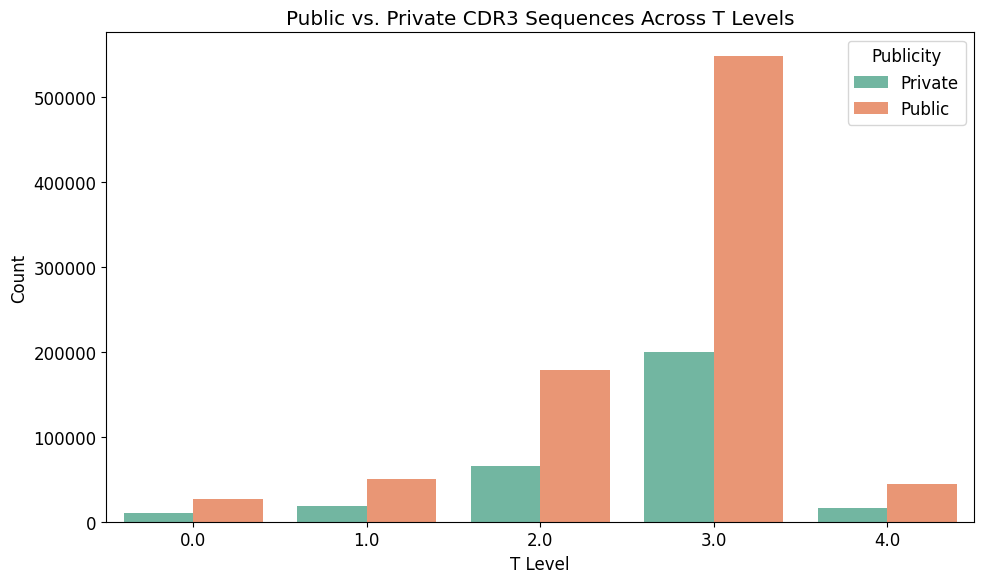

In [11]:
plot_count(df=CRC_data_df, X='T', hue='Public_Private_label', title='Public vs. Private CDR3 Sequences Across T Levels', 
    xlabel='T Level', legend_title='Publicity', labels=['Private', 'Public'], figure_name='/home/ubuntu/CRC_Project/CRC_blood/plots/publicity_across_T.png')

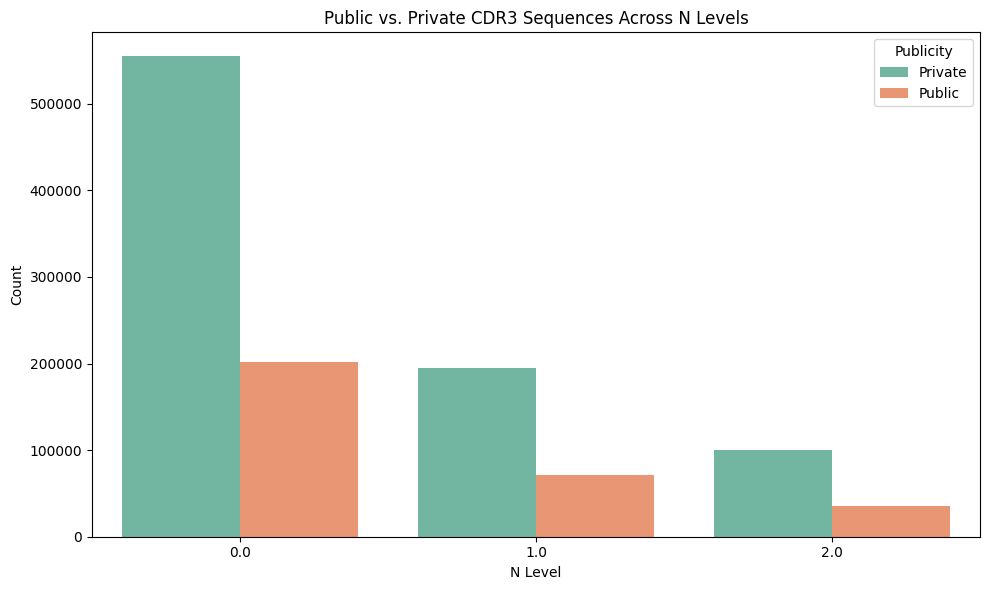

In [12]:
plot_count(df=CRC_data_df, X='N', hue='Public_Private_label', title='Public vs. Private CDR3 Sequences Across N Levels', 
    xlabel='N Level', legend_title='Publicity', labels=['Private', 'Public'], figure_name='/home/ubuntu/CRC_Project/CRC_blood/plots/publicity_across_N.png')

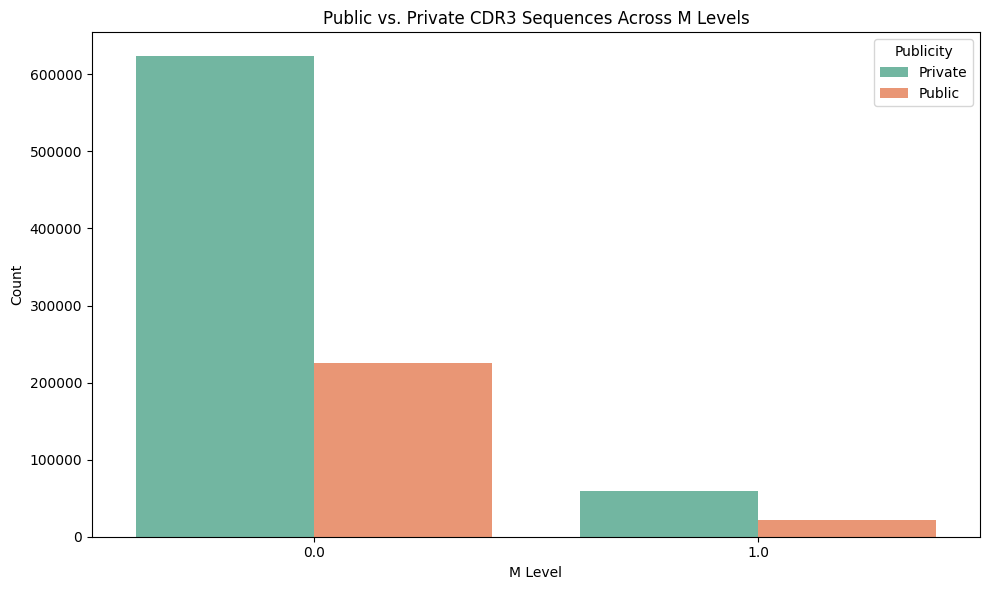

In [13]:
plot_count(df=CRC_data_df, X='M', hue='Public_Private_label', title='Public vs. Private CDR3 Sequences Across M Levels', 
    xlabel='M Level', legend_title='Publicity', labels=['Private', 'Public'], figure_name='/home/ubuntu/CRC_Project/CRC_blood/plots/publicity_across_M.png')

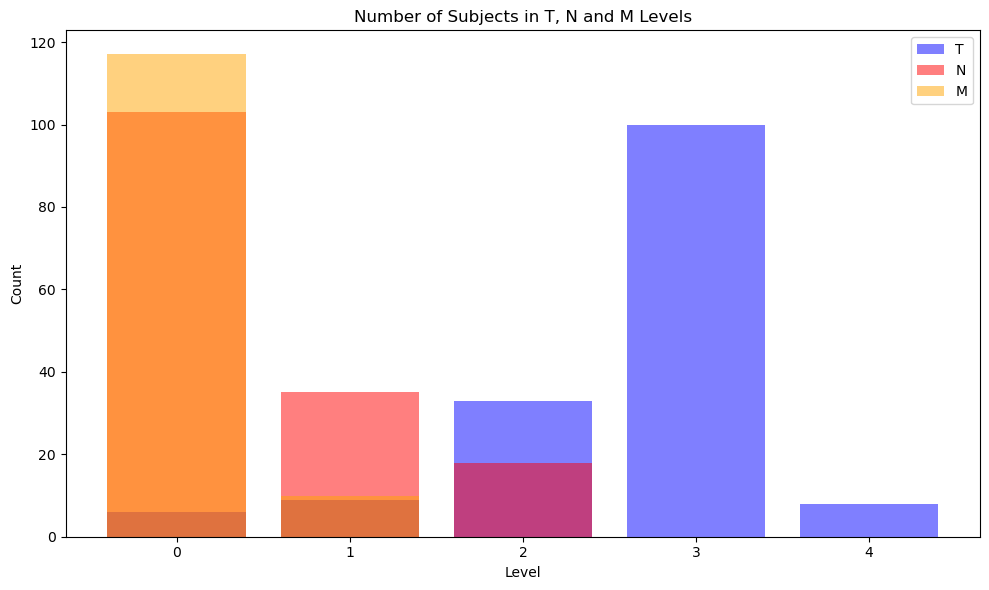

In [12]:
# plot the number of T and N subjects
# group the T and N by subject
T_grouped = CRC_data_df.groupby('Subject')['T'].first()
N_grouped = CRC_data_df.groupby('Subject')['N'].first()
M_grouped = CRC_data_df.groupby('Subject')['M'].first()

# count the number of T and N subjects
T_counts = T_grouped.value_counts()
N_counts = N_grouped.value_counts()
M_counts = M_grouped.value_counts()

# set font size to 12
plt.rcParams.update({'font.size': 12})

# plot the number of T and N subjects
plt.figure(figsize=(10, 6))
plt.bar(T_counts.index, T_counts.values, color='blue', alpha=0.5, label='T')
plt.bar(N_counts.index, N_counts.values, color='red', alpha=0.5, label='N')
plt.bar(M_counts.index, M_counts.values, color='orange', alpha=0.5, label='M')
plt.title('Number of Subjects in T, N and M Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('/home/ubuntu/CRC_Project/CRC_blood/plots/number_of_T_N_M_subjects.png', dpi=1200)
plt.show()

In [13]:
CRC_data_df

,cloneCount,Proportion,CDR3.nt,V.name,J.name,D.name,aaSeqCDR3,Subject,count,Public_Private_label,v_gene,j_gene,T,N,M
0,91,0.007901,TGTGCCAGCAGGGAGAATCTCTCCTACGAGCAGTACTTC,TRBV6-5*00(1959.9),TRBJ2-7*00(469.8),NaN,CASRENLSYEQYF,pool1_S1,1,private,TRBV6-5,TRBJ2-7,3.0,1.0,0.0
1,77,0.006686,TGCGCCAGCAGCGCCAGCCCTTTAGCGGGGGGGCAGGGTGAGCAGT...,TRBV5-1*00(1877.2),TRBJ2-1*00(410),TRBD2*00(46),CASSASPLAGGQGEQFF,pool1_S1,1,private,TRBV5-1,TRBJ2-1,3.0,1.0,0.0
2,73,0.006338,TGCGCCAGCAGCTTGACCGGATCCGCCTACGAGCAGTACTTC,TRBV5-1*00(1991.3),TRBJ2-7*00(450),NaN,CASSLTGSAYEQYF,pool1_S1,1,private,TRBV5-1,TRBJ2-7,3.0,1.0,0.0
3,61,0.005297,TGCAGCGCCGATCAGGGGTCGAATGAGCAGTTCTTC,TRBV29-1*00(1925.9),TRBJ2-1*00(430),TRBD1*00(31),CSADQGSNEQFF,pool1_S1,1,private,TRBV29-1,TRBJ2-1,3.0,1.0,0.0
4,45,0.003907,TGTGCCAGCAGCTCGAGGGGCCTTCAGAACTATGGCTACACCTTC,TRBV7-9*00(1950.9),TRBJ1-2*00(460),TRBD2*00(31),CASSSRGLQNYGYTF,pool1_S1,1,private,TRBV7-9,TRBJ1-2,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484602,1,0.000087,TGCAGCGTTGGAGAGGCCGGGGAGCTGTTTTTT,TRBV29-1*00(2051),TRBJ2-2*00(450),NaN,CSVGEAGELFF,pool9_S7,1,private,TRBV29-1,TRBJ2-2,2.0,0.0,0.0
1484603,1,0.000087,TGCAGCGTTGAGAACCGCTACGAGCAGTACTTC,TRBV29-1*00(2050),TRBJ2-7*00(440),NaN,CSVENRYEQYF,pool9_S7,1,private,TRBV29-1,TRBJ2-7,2.0,0.0,0.0
1484604,1,0.000087,TGCAGCGTCGCCGACAGGGGAGCCATATATTTT,TRBV29-1*00(2020),TRBJ1-3*00(390),TRBD1*00(40),CSVADRGAIYF,pool9_S7,1,private,TRBV29-1,TRBJ1-3,2.0,0.0,0.0
1484605,1,0.000087,TGCAGCGTAGTCCCCCGGGATGAGCAGTTCTTC,TRBV29-1*00(1639),TRBJ2-1*00(420),"TRBD1*00(30), TRBD2*00(30)",CSVVPRDEQFF,pool9_S7,1,private,TRBV29-1,TRBJ2-1,2.0,0.0,0.0


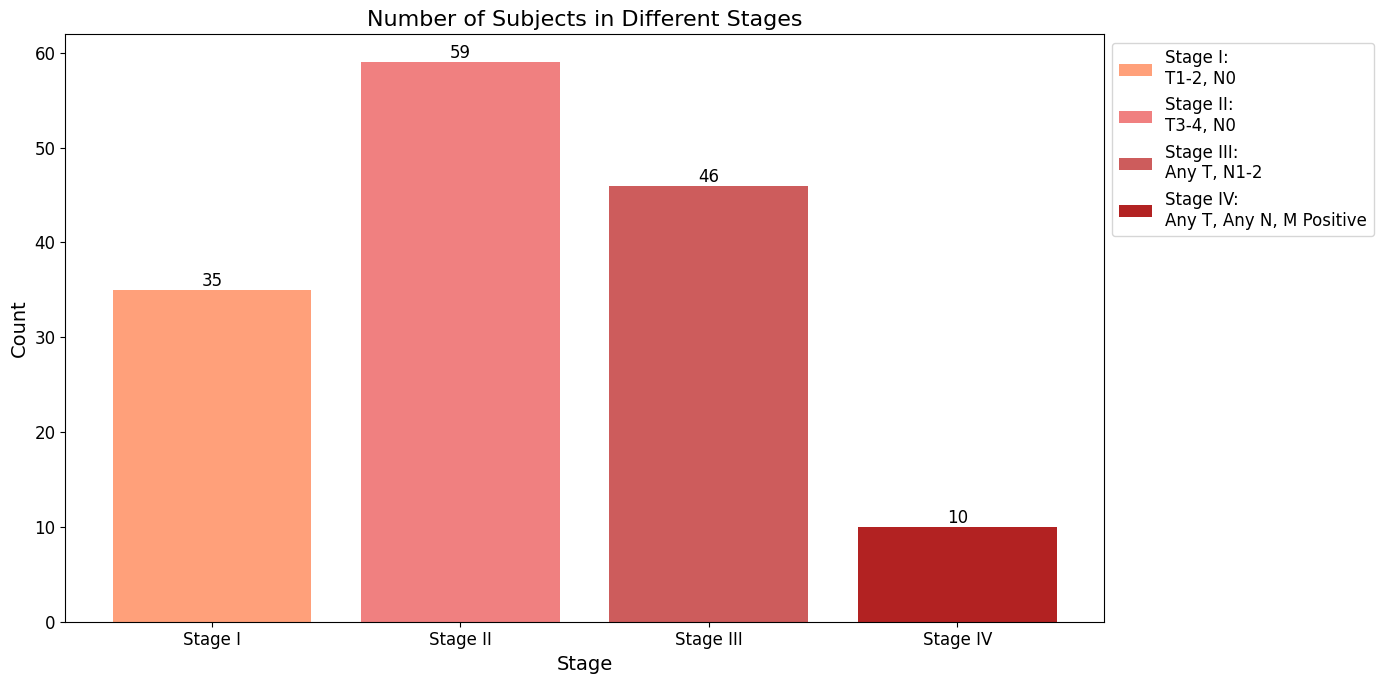


Stage counts:
Stage
Stage I      35
Stage II     59
Stage III    46
Stage IV     10
Name: count, dtype: int64


In [35]:
# Function to determine the stage
def get_stage(T, N, M):
    if M == 1:
        return 'Stage IV'
    elif N in [1, 2]:
        return 'Stage III'
    elif T in [3, 4] and N == 0:
        return 'Stage II'
    elif T in [1, 2] and N == 0:
        return 'Stage I'
    else:
        return None

# Group by subject and get the first T, N, and M values for each subject
grouped = CRC_data_df.groupby('Subject').first()[['T', 'N', 'M']]

# Apply the staging function
grouped['Stage'] = grouped.apply(lambda row: get_stage(row['T'], row['N'], row['M']), axis=1)

# Count the number of subjects in each stage
stage_counts = grouped['Stage'].value_counts().sort_index()

# Define colors and labels for each stage
stage_info = {
    'Stage I': {'color': '#FFA07A', 'label': 'Stage I:\nT1-2, N0'},
    'Stage II': {'color': '#F08080', 'label': 'Stage II:\nT3-4, N0'},
    'Stage III': {'color': '#CD5C5C', 'label': 'Stage III:\nAny T, N1-2'},
    'Stage IV': {'color': '#B22222', 'label': 'Stage IV:\nAny T, Any N, M Positive'},
    # 'Unknown': {'color': 'gray', 'label': 'Unknown:\nOther combinations'}
}

# Create a bar plot with custom colors
plt.figure(figsize=(14, 7))
bars = plt.bar(stage_counts.index, stage_counts.values, 
               color=[stage_info[stage]['color'] for stage in stage_counts.index])

plt.title('Number of Subjects in Different Stages', fontsize=16)
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=info['color'], edgecolor='none', label=info['label']) 
                   for stage, info in stage_info.items() if stage in stage_counts.index]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# plt.savefig('/home/ubuntu/CRC_Project/CRC_blood/plots/number_of_subjects_by_stage.png', dpi=1200, bbox_inches='tight')
plt.show()

# Print the counts
print("\nStage counts:")
print(stage_counts)

In [17]:
# Print subjects with "Unknown" stage
unknown_subjects = grouped[grouped['Stage'] == 'Unknown']
print("Subjects with Unknown stage:")
print(unknown_subjects)

Subjects with Unknown stage:
             T    N    M    Stage
Subject                          
pool6_S17  0.0  0.0  0.0  Unknown
pool6_S21  0.0  0.0  0.0  Unknown
pool6_S6   0.0  0.0  0.0  Unknown
pool8_S18  0.0  0.0  0.0  Unknown
pool9_S22  0.0  0.0  0.0  Unknown
pool9_S6   0.0  0.0  0.0  Unknown


T/N/M Combination Heatmaps

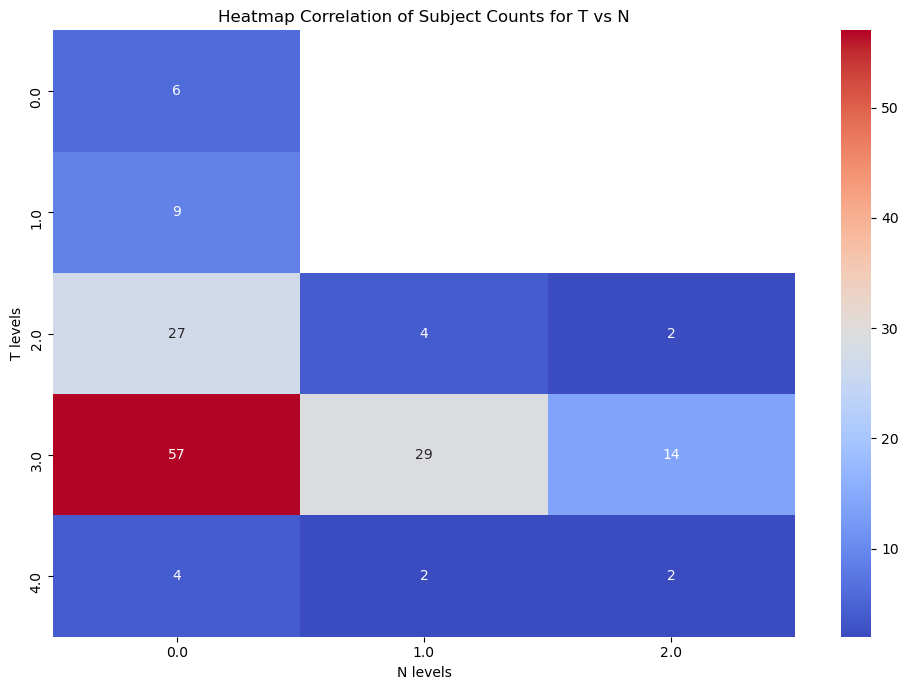

In [14]:
plot_CRC_unique_combination_heatmap(CRC_data_df, 'T', 'N', 'Heatmap Correlation of Subject Counts for T vs N', '/home/ubuntu/CRC_Project/CRC_blood/plots/heatmap_T_vs_N.png')

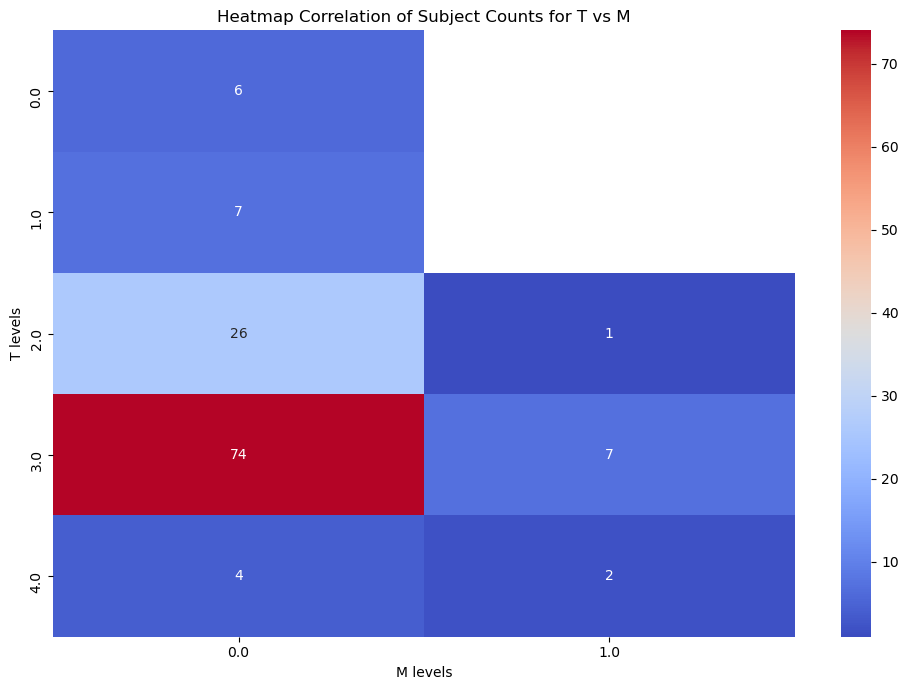

In [15]:
plot_CRC_unique_combination_heatmap(CRC_data_df, 'T', 'M', 'Heatmap Correlation of Subject Counts for T vs M', '/home/ubuntu/CRC_Project/CRC_blood/plots/heatmap_T_vs_M.png')

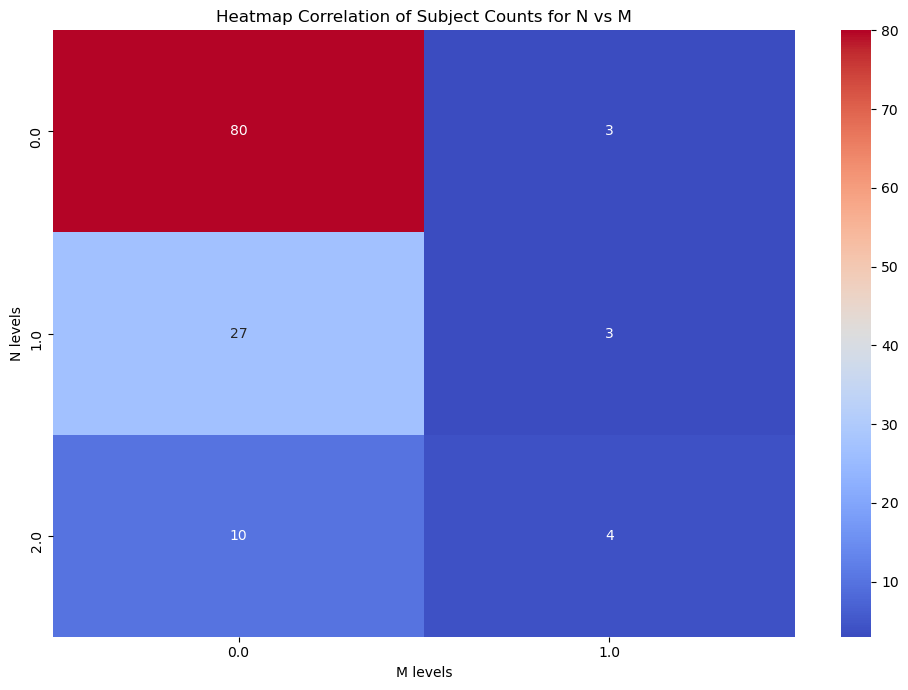

In [16]:
plot_CRC_unique_combination_heatmap(CRC_data_df, 'N', 'M', 'Heatmap Correlation of Subject Counts for N vs M', '/home/ubuntu/CRC_Project/CRC_blood/plots/heatmap_N_vs_M.png')

#### MAIT Cell Analysis

In [13]:
# add chain column to CRC_data_df
CRC_data_df['chain'] = CRC_data_df['v_gene'].apply(lambda x: 'TRA' if x.startswith('TRA') else 'TRB')
CRC_data_df

/tmp/ipykernel_16453/450947615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRC_data_df['chain'] = CRC_data_df['v_gene'].apply(lambda x: 'TRA' if x.startswith('TRA') else 'TRB')


,cloneCount,Proportion,CDR3.nt,V.name,J.name,D.name,aaSeqCDR3,Subject,count,Public_Private_label,v_gene,j_gene,T,N,M,chain
0,91,0.007901,TGTGCCAGCAGGGAGAATCTCTCCTACGAGCAGTACTTC,TRBV6-5*00(1959.9),TRBJ2-7*00(469.8),NaN,CASRENLSYEQYF,pool1_S1,1,private,TRBV6-5,TRBJ2-7,3.0,1.0,0.0,TRB
1,77,0.006686,TGCGCCAGCAGCGCCAGCCCTTTAGCGGGGGGGCAGGGTGAGCAGT...,TRBV5-1*00(1877.2),TRBJ2-1*00(410),TRBD2*00(46),CASSASPLAGGQGEQFF,pool1_S1,1,private,TRBV5-1,TRBJ2-1,3.0,1.0,0.0,TRB
2,73,0.006338,TGCGCCAGCAGCTTGACCGGATCCGCCTACGAGCAGTACTTC,TRBV5-1*00(1991.3),TRBJ2-7*00(450),NaN,CASSLTGSAYEQYF,pool1_S1,1,private,TRBV5-1,TRBJ2-7,3.0,1.0,0.0,TRB
3,61,0.005297,TGCAGCGCCGATCAGGGGTCGAATGAGCAGTTCTTC,TRBV29-1*00(1925.9),TRBJ2-1*00(430),TRBD1*00(31),CSADQGSNEQFF,pool1_S1,1,private,TRBV29-1,TRBJ2-1,3.0,1.0,0.0,TRB
4,45,0.003907,TGTGCCAGCAGCTCGAGGGGCCTTCAGAACTATGGCTACACCTTC,TRBV7-9*00(1950.9),TRBJ1-2*00(460),TRBD2*00(31),CASSSRGLQNYGYTF,pool1_S1,1,private,TRBV7-9,TRBJ1-2,3.0,1.0,0.0,TRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484602,1,0.000087,TGCAGCGTTGGAGAGGCCGGGGAGCTGTTTTTT,TRBV29-1*00(2051),TRBJ2-2*00(450),NaN,CSVGEAGELFF,pool9_S7,1,private,TRBV29-1,TRBJ2-2,2.0,0.0,0.0,TRB
1484603,1,0.000087,TGCAGCGTTGAGAACCGCTACGAGCAGTACTTC,TRBV29-1*00(2050),TRBJ2-7*00(440),NaN,CSVENRYEQYF,pool9_S7,1,private,TRBV29-1,TRBJ2-7,2.0,0.0,0.0,TRB
1484604,1,0.000087,TGCAGCGTCGCCGACAGGGGAGCCATATATTTT,TRBV29-1*00(2020),TRBJ1-3*00(390),TRBD1*00(40),CSVADRGAIYF,pool9_S7,1,private,TRBV29-1,TRBJ1-3,2.0,0.0,0.0,TRB
1484605,1,0.000087,TGCAGCGTAGTCCCCCGGGATGAGCAGTTCTTC,TRBV29-1*00(1639),TRBJ2-1*00(420),"TRBD1*00(30), TRBD2*00(30)",CSVVPRDEQFF,pool9_S7,1,private,TRBV29-1,TRBJ2-1,2.0,0.0,0.0,TRB


In [14]:
# MAIT Labeling according to VDJ genes
MAIT_v_gene='TRAV1-2'
MAIT_j_gene = ['TRAJ33', 'TRAJ20', 'TRAJ12']

v_gene_tra_use = MAIT_v_gene
j_gene_tra_use = MAIT_j_gene
cell_label_to_use = 'MAIT_cell'

In [17]:
CRC_data_df_MAIT = label_MAIT(CRC_data_df, v_gene_tra_use, j_gene_tra_use, cell_label_to_use)
CRC_data_df_MAIT

,cloneCount,Proportion,CDR3.nt,V.name,J.name,D.name,aaSeqCDR3,Subject,count,Public_Private_label,v_gene,j_gene,T,N,M,chain,MAIT_cell
11,18,0.001563,TGTGCTCTGAGTGAGGAAAATGGAGGCTTCAAAACTATCTTT,TRAV19*00(1810.9),TRAJ9*00(530),NaN,CALSEENGGFKTIF,pool1_S1,2,public,TRAV19,TRAJ9,3.0,1.0,0.0,TRA,non-MAIT_cell
12,18,0.001563,TGTGCAATGTCCCCTTTGAACACAGGCTTTCAGAAACTTGTATTT,TRAV12-3*00(1800),TRAJ8*00(600),NaN,CAMSPLNTGFQKLVF,pool1_S1,1,private,TRAV12-3,TRAJ8,3.0,1.0,0.0,TRA,non-MAIT_cell
17,14,0.001216,TGTGCTGTGGAAAGGCTACAGTTATTAACCGGTAACCAGTTCTATTTT,TRAV36DV7*00(1796.4),TRAJ49*00(520),NaN,CAVERLQLLTGNQFYF,pool1_S1,1,private,TRAV36DV7,TRAJ49,3.0,1.0,0.0,TRA,non-MAIT_cell
20,13,0.001129,TGTGCTGTGAGTGACCTCCTTTCTGGGGGTTACCAGAAAGTTACCTTT,TRAV8-4*00(982.8),TRAJ13*00(590),NaN,CAVSDLLSGGYQKVTF,pool1_S1,1,private,TRAV8-4,TRAJ13,3.0,1.0,0.0,TRA,non-MAIT_cell
27,11,0.000955,TGCATCCTGAGAGACGGGGGTAGTGGAGGTAGCAACTATAAACTGA...,TRAV26-2*00(1763.9),TRAJ53*00(620),NaN,CILRDGGSGGSNYKLTF,pool1_S1,2,public,TRAV26-2,TRAJ53,3.0,1.0,0.0,TRA,non-MAIT_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484602,1,0.000087,TGCAGCGTTGGAGAGGCCGGGGAGCTGTTTTTT,TRBV29-1*00(2051),TRBJ2-2*00(450),NaN,CSVGEAGELFF,pool9_S7,1,private,TRBV29-1,TRBJ2-2,2.0,0.0,0.0,TRB,non-MAIT_cell
1484603,1,0.000087,TGCAGCGTTGAGAACCGCTACGAGCAGTACTTC,TRBV29-1*00(2050),TRBJ2-7*00(440),NaN,CSVENRYEQYF,pool9_S7,1,private,TRBV29-1,TRBJ2-7,2.0,0.0,0.0,TRB,non-MAIT_cell
1484604,1,0.000087,TGCAGCGTCGCCGACAGGGGAGCCATATATTTT,TRBV29-1*00(2020),TRBJ1-3*00(390),TRBD1*00(40),CSVADRGAIYF,pool9_S7,1,private,TRBV29-1,TRBJ1-3,2.0,0.0,0.0,TRB,non-MAIT_cell
1484605,1,0.000087,TGCAGCGTAGTCCCCCGGGATGAGCAGTTCTTC,TRBV29-1*00(1639),TRBJ2-1*00(420),"TRBD1*00(30), TRBD2*00(30)",CSVVPRDEQFF,pool9_S7,1,private,TRBV29-1,TRBJ2-1,2.0,0.0,0.0,TRB,non-MAIT_cell


Export MAIT - this can be done only once

In [18]:
# merge the embeddings with the CRC_data_df_MAIT dataframe according to the Subject and aaSeqCDR3 in CRC_data_df_MAIT
# MAIT_emeddings_data_joined = CRC_data_df_MAIT.merge(embedding_data_df, on=['Subject', 'aaSeqCDR3'], how='inner')
# MAIT_emeddings_data_joined.to_pickle('/home/CRC_Project/CRC_blood/CRC_blood_data/downsampled_data_with_all_labels_embeddings.pkl')

##### MAIT-cell Specific Analysis

In [19]:
MAIT_df = CRC_data_df_MAIT[CRC_data_df_MAIT['MAIT_cell'] == 'MAIT_cell']
MAIT_df

,cloneCount,Proportion,CDR3.nt,V.name,J.name,D.name,aaSeqCDR3,Subject,count,Public_Private_label,v_gene,j_gene,T,N,M,chain,MAIT_cell
785,2,0.000174,TGTGCTGTGAGATTCGACTACAAGCTCAGCTTT,TRAV1-2*00(2040),TRAJ20*00(500),NaN,CAVRFDYKLSF,pool1_S1,1,private,TRAV1-2,TRAJ20,3.0,1.0,0.0,TRA,MAIT_cell
2552,1,0.000087,TGTGCTGTGGAGGATAACGACTACAAGCTCAGCTTT,TRAV1-2*00(1640),TRAJ20*00(530),NaN,CAVEDNDYKLSF,pool1_S1,7,public,TRAV1-2,TRAJ20,3.0,1.0,0.0,TRA,MAIT_cell
2582,1,0.000087,TGTGCTTTCAACGACTACAAGCTCAGCTTT,TRAV1-2*00(1936.7),TRAJ20*00(520),NaN,CAFNDYKLSF,pool1_S1,14,public,TRAV1-2,TRAJ20,3.0,1.0,0.0,TRA,MAIT_cell
3467,1,0.000087,TGTGCTGCCTTGATGGATAGCAGCTATAAATTGATCTTC,TRAV1-2*00(1920),TRAJ12*00(561),NaN,CAALMDSSYKLIF,pool1_S1,1,private,TRAV1-2,TRAJ12,3.0,1.0,0.0,TRA,MAIT_cell
3624,1,0.000087,TGTGCTGTGCTTTCTAACGACTACAAGCTCAGCTTT,TRAV1-2*00(1970),TRAJ20*00(560),NaN,CAVLSNDYKLSF,pool1_S1,10,public,TRAV1-2,TRAJ20,3.0,1.0,0.0,TRA,MAIT_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475550,1,0.000087,TGTGCCCTGGTATCTAACGACTACAAGCTCAGCTTT,TRAV1-2*00(1920),TRAJ20*00(550),NaN,CALVSNDYKLSF,pool9_S6,3,public,TRAV1-2,TRAJ20,0.0,0.0,0.0,TRA,MAIT_cell
1475673,1,0.000087,TGTGCTGTGACAAACGACTACAAGCTCAGCTTT,TRAV1-2*00(2020),TRAJ20*00(520),NaN,CAVTNDYKLSF,pool9_S6,35,public,TRAV1-2,TRAJ20,0.0,0.0,0.0,TRA,MAIT_cell
1482181,1,0.000087,TGTGCTGTGAGAGATCACGACTACAAGCTCAGCTTT,TRAV1-2*00(2018),TRAJ20*00(510),NaN,CAVRDHDYKLSF,pool9_S7,8,public,TRAV1-2,TRAJ20,2.0,0.0,0.0,TRA,MAIT_cell
1482654,1,0.000087,TGTGCTGTCCTATCTAGCAACGACTACAAGCTCAGCTTT,TRAV1-2*00(1930),TRAJ20*00(520),NaN,CAVLSSNDYKLSF,pool9_S7,5,public,TRAV1-2,TRAJ20,2.0,0.0,0.0,TRA,MAIT_cell


In [20]:
MAIT_public = MAIT_df[MAIT_df['Public_Private_label'] == 'public']
MAIT_private = MAIT_df[MAIT_df['Public_Private_label'] == 'private']
collections.Counter(MAIT_public['chain']), collections.Counter(MAIT_private['chain'])                

(Counter({'TRA': 448}), Counter({'TRA': 177}))

In [26]:
MAIT_df_unique = MAIT_df.drop_duplicates(subset=['aaSeqCDR3'])
collections.Counter(MAIT_df_unique['Public_Private_label'])

Counter({'public': 191, 'private': 177})

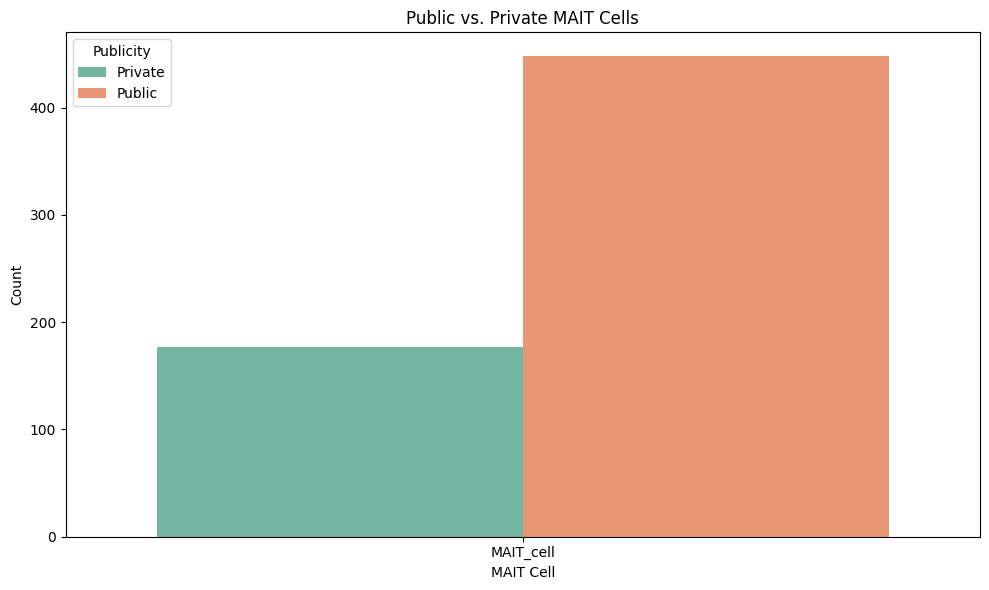

In [28]:
# plot the count distribution of MAIT cells public vs private
plot_count(df=MAIT_df, X='MAIT_cell', hue='Public_Private_label', title='Public vs. Private MAIT Cells', 
    xlabel='MAIT Cell', legend_title='Publicity', labels=['Private', 'Public'], figure_name='/home/ubuntu/CRC_Project/CRC_blood/plots/publicity_across_MAIT.png')

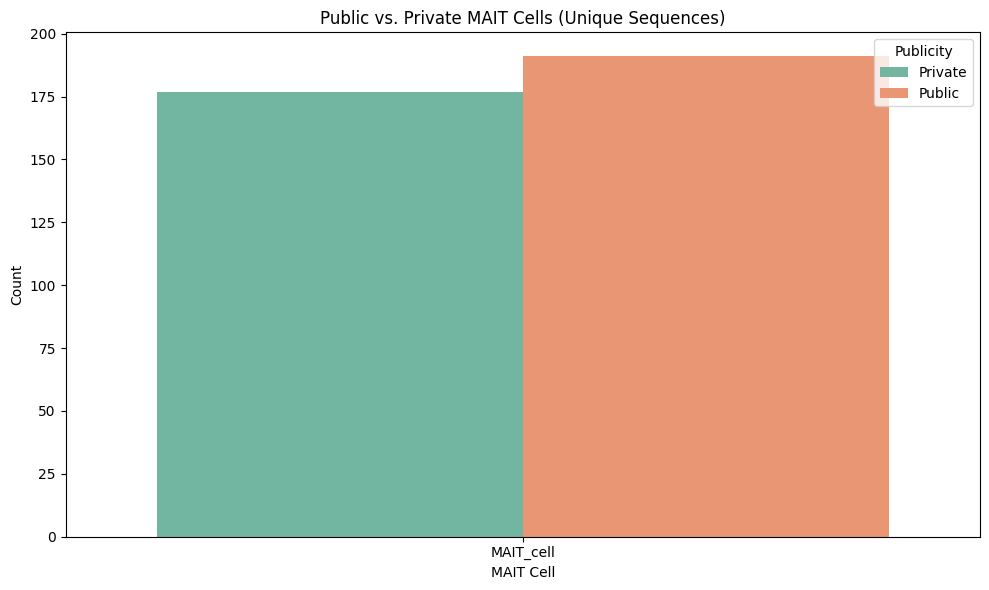

In [27]:
# plot the count distribution of MAIT cells public vs private
plot_count(df=MAIT_df_unique, X='MAIT_cell', hue='Public_Private_label', title='Public vs. Private MAIT Cells (Unique Sequences)', 
    xlabel='MAIT Cell', legend_title='Publicity', labels=['Private', 'Public'], figure_name='/home/ubuntu/CRC_Project/CRC_blood/plots/unique_publicity_across_MAIT.png')